In [2]:
import pandas as pd
df = pd.read_csv("/home/yash/Desktop/Codes/Ml/salaries.csv")
df

/tmp/ipykernel_4686/739038868.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,company,job,degree,salary_more_than_100k
0,google,slaes executive,bachelors,0
1,google,slaes executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [5]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()
df['company'] = le_company.fit_transform(df['company'])
df['job'] = le_job.fit_transform(df['job'])
df['degree'] = le_degree.fit_transform(df['degree'])
df

,company,job,degree,salary_more_than_100k
0,2,3,0,0
1,2,3,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0
5,2,1,1,1
6,0,2,1,0
7,0,1,0,0
8,0,0,0,0
9,0,0,1,1


In [13]:
features_col = ['company','job','degree']
x = df[features_col]
y = df.salary_more_than_100k
x

,company,job,degree
0,2,3,0
1,2,3,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [14]:
y


0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_than_100k, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [18]:
y_test

6     0
14    1
11    1
3     1
15    1
Name: salary_more_than_100k, dtype: int64

In [20]:
x_test

,company,job,degree
6,0,2,1
14,1,1,0
11,1,2,1
3,2,0,1
15,1,1,1


In [19]:
from sklearn.tree import DecisionTreeClassifier;
classifier = DecisionTreeClassifier(criterion='gini')
classifier.fit(x_train,y_train)
classifier.predict(x_test)


array([1, 0, 1, 1, 1])

[Text(0.6666666666666666, 0.9166666666666666, 'x[1] <= 2.5\ngini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(0.5, 0.75, 'x[2] <= 0.5\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.3333333333333333, 0.5833333333333334, 'x[0] <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.16666666666666666, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.5, 0.4166666666666667, 'x[1] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.3333333333333333, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6666666666666666, 0.25, 'x[1] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.5833333333333334, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8333333333333334, 0.75, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

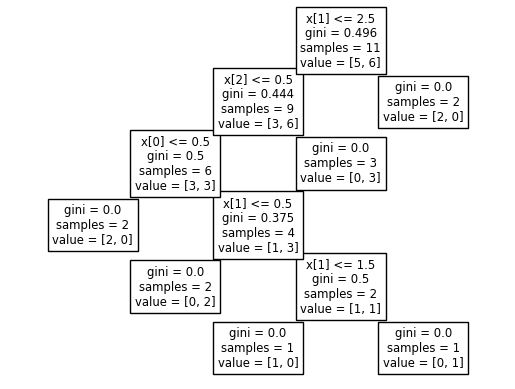

In [21]:
from sklearn import tree
tree.plot_tree(classifier)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


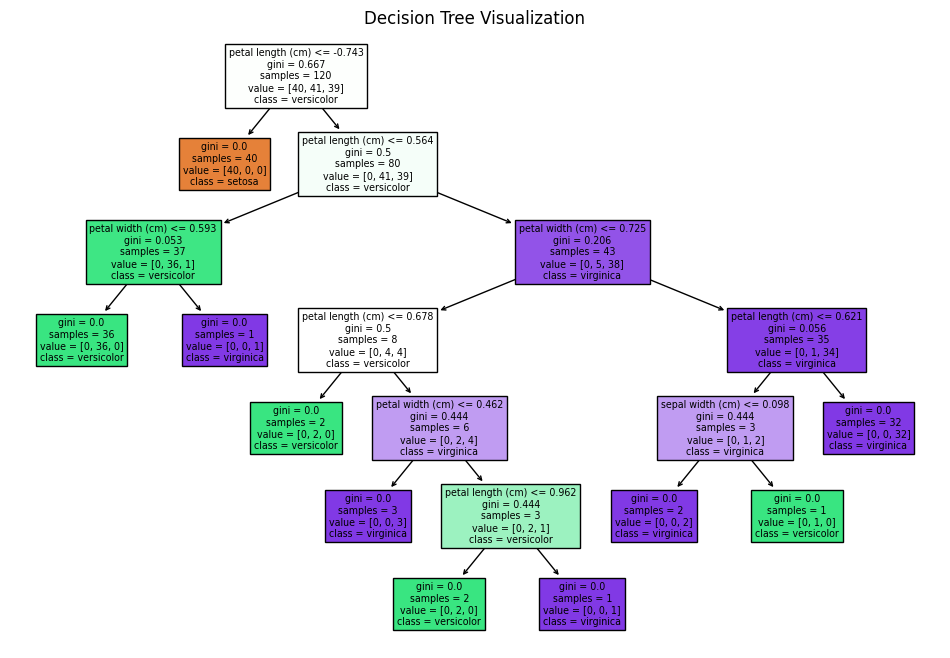

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()


Mean squared error: 4897.146067415731
R2 score: 0.07568784363587666


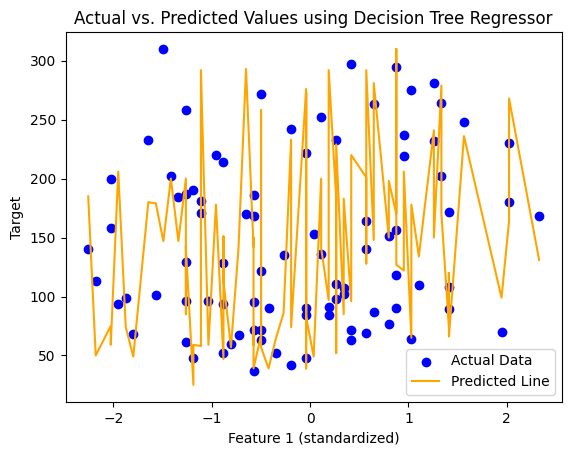

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit the model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))

# Plot the results
# Choose a single feature for plotting, e.g., the first feature
feature_index = 0
sorted_indices = np.argsort(X_test[:, feature_index])
X_test_sorted = X_test[sorted_indices]
y_test_sorted = y_test[sorted_indices]
y_test_pred_sorted = y_pred[sorted_indices]

plt.scatter(X_test_sorted[:, feature_index], y_test_sorted, color='blue', label='Actual Data')
plt.plot(X_test_sorted[:, feature_index], y_test_pred_sorted, color='orange', label='Predicted Line')
plt.xlabel('Feature 1 (standardized)')
plt.ylabel('Target')
plt.title('Actual vs. Predicted Values using Decision Tree Regressor')
plt.legend()
plt.show()
